## This notebook describes how to extract taxonomy information starting from an NCBI taxid, and describes how that information was used to plot a bar chart and make phylogenetic tree visualizations for our set of repeat expansion protein homologs 



In [1]:
#Load all of the packages required to run this notebook

if (!requireNamespace("pacman", quietly = TRUE))
    install.packages("pacman")

pacman::p_load("magrittr")
pacman::p_load("tidyverse")
pacman::p_load("gplots")
pacman::p_load("svglite")
pacman::p_load("reshape2")

### How to pull out desired taxonomic lineage information starting from NCBI taxid's

### Pull and format taxonomy lookup table from NCBI

In [2]:
# Pull out the rankedlineage.dmp file from the new_taxdump directory at NCBI
# This code block uses code adapted from here: https://www.biostars.org/p/317073/

runcmd <- function(cmd, verbose = TRUE) {
    output <- system2(command = cmd, stdout = TRUE, stderr = TRUE, shell = TRUE)
    if (verbose) {
        print(paste("Stdout: ", output[[1]], " Stderr: ", output[[2]]))
    }
}

download.file("https://ftp.ncbi.nlm.nih.gov/pub/taxonomy/new_taxdump/new_taxdump.tar.gz", "new_taxdump.tar.gz", method = "auto")

# Unzipping tar.gz file
untar("new_taxdump.tar.gz", exdir = "./new_taxdump")

# Print the names of the files in the tar
tarfile_list <- untar("new_taxdump.tar.gz", list = TRUE) %>% as.character
print(tarfile_list)

 [1] "citations.dmp"        "delnodes.dmp"         "division.dmp"        
 [4] "excludedfromtype.dmp" "fullnamelineage.dmp"  "gencode.dmp"         
 [7] "host.dmp"             "images.dmp"           "merged.dmp"          
[10] "names.dmp"            "nodes.dmp"            "rankedlineage.dmp"   
[13] "taxidlineage.dmp"     "typematerial.dmp"     "typeoftype.dmp"      


In [3]:
#format the rankedlineage file to make a table that has taxid with corresponding lineage
# This code block uses code from here: https://www.biostars.org/p/317073/
tax <- read_tsv("rankedlineage.dmp", 
         col_names = c("id", "name", "s", "g", "f", "o", "c","p", "k", "d"), 
         col_types=("i-c-c-c-c-c-c-c-c-c-"))

table1 <- gather(tax, "key", "value", 2:10) %>%
         filter(!is.na(value)) %>% 
          unite(2:3, col="name", sep="=") 
table1
tax2 <-  group_by(table1, id) %>% 
      summarize(lineage= paste(name, collapse="; "))
tax2

id      name                                             
1              1 name=root                                        
2         131567 name=cellular organisms                          
3           2157 name=Archaea                                     
4        1935183 name=Asgard group                                
5        2798909 name=Candidatus Baldrarchaeota                   
6        2798916 name=Candidatus Baldrarchaeia                    
7        2798922 name=Candidatus Baldrarchaeales                  
8        2798928 name=Candidatus Baldrarchaeaceae                 
9        2798934 name=Candidatus Baldrarchaeum                    
10       2798940 name=Candidatus Baldrarchaeum yapensis           
11       2799004 name=unclassified Candidatus Baldrarchaeota      
12       2799005 name=Candidatus Baldrarchaeota archaeon          
13       2798908 name=Candidatus Borrarchaeota                    
14       2798915 name=Candidatus Borrarchaeia                     
15       2798921 name=Candidatus Borrarchaeales                   
16       2798927 name=Candidatus Borrarchaeaceae                  
17       2798933 name=Candidatus Borrarchaeum                     
18       2848170 name=Candidatus Borrarchaeum weybense            
19       2798939 name=Candidatus Borrarchaeum yapensis            
20       2841639 name=unclassified Candidatus Borrarchaeum        
21       2841640 name=Candidatus Borrachaaeum sp. lw60_2018_gm2_56
22       2846742 name=Candidatus Borrarchaeum sp.                 
23       2799002 name=unclassified Candidatus Borrarchaeota       
24       2799003 name=Candidatus Borrarchaeota archaeon           
25       2827219 name=Candidatus Freyarchaeota                    
26       3036974 name=Candidatus Freyrarchaeia                    
27       3036975 name=Candidatus Freyrarchaeales                  
28       3036976 name=Candidatus Freyrarchaeaceae                 
29       3036977 name=Candidatus Freyrarchaeum                    
30       3036978 name=Candidatus Freyrarchaeum guaymaensis        
⋮        ⋮       ⋮                                                
18168018 1198333 d=Viruses                                        
18168019 1416629 d=Viruses                                        
18168020 1414770 d=Viruses                                        
18168021 1198330 d=Viruses                                        
18168022 1416630 d=Viruses                                        
18168023 1414768 d=Viruses                                        
18168024 1414769 d=Viruses                                        
18168025 1419328 d=Viruses                                        
18168026 1732297 d=Viruses                                        
18168027 2042532 d=Viruses                                        
18168028 1960247 d=Viruses                                        
18168029  398817 d=Viruses                                        
18168030 2042530 d=Viruses                                        
18168031  239364 d=Viruses                                        
18168032 2115881 d=Viruses                                        
18168033  375198 d=Viruses                                        
18168034  186617 d=Viruses                                        
18168035 1868660 d=Viruses                                        
18168036 1075823 d=Viruses                                        
18168037  381900 d=Viruses                                        
18168038  381901 d=Viruses                                        
18168039  340016 d=Viruses                                        
18168040 1448990 d=Viruses                                        
18168041 1448985 d=Viruses                                        
18168042 1448988 d=Viruses                                        
18168043 1450698 d=Viruses                                        
18168044 1448991 d=Viruses                                        
18168045 1448989 d=Viruses                              

id     
1        1     
2        2     
3        6     
4        7     
5        9     
6       10     
7       11     
8       13     
9       14     
10      16     
11      17     
12      18     
13      19     
14      20     
15      21     
16      22     
17      23     
18      24     
19      25     
20      27     
21      28     
22      29     
23      31     
24      32     
25      33     
26      34     
27      35     
28      38     
29      39     
30      40     
⋮       ⋮      
2513318 3057456
2513319 3057457
2513320 3057458
2513321 3057459
2513322 3057460
2513323 3057461
2513324 3057462
2513325 3057463
2513326 3057464
2513327 3057465
2513328 3057466
2513329 3057467
2513330 3057468
2513331 3057469
2513332 3057470
2513333 3057471
2513334 3057472
2513335 3057473
2513336 3057474
2513337 3057475
2513338 3057476
2513339 3057477
2513340 3057582
2513341 3057583
2513342 3057584
2513343 3057585
2513344 3057586
2513345 3057590
2513346 3057661
2513347 3057985
        lineage                                                                                                                                                 
1       name=root                                                                                                                                               
2       name=Bacteria                                                                                                                                           
3       name=Azorhizobium; f=Xanthobacteraceae; o=Hyphomicrobiales; c=Alphaproteobacteria; p=Pseudomonadota; d=Bacteria                                         
4       name=Azorhizobium caulinodans; g=Azorhizobium; f=Xanthobacteraceae; o=Hyphomicrobiales; c=Alphaproteobacteria; p=Pseudomonadota; d=Bacteria             
5       name=Buchnera aphidicola; g=Buchnera; f=Erwiniaceae; o=Enterobacterales; c=Gammaproteobacteria; p=Pseudomonadota; d=Bacteria                            
6       name=Cellvibrio; f=Cellvibrionaceae; o=Cellvibrionales; c=Gammaproteobacteria; p=Pseudomonadota; d=Bacteria                                             
7       name=Cellulomonas gilvus; g=Cellulomonas; f=Cellulomonadaceae; o=Micrococcales; c=Actinomycetes; p=Actinomycetota; d=Bacteria                           
8       name=Dictyoglomus; f=Dictyoglomaceae; o=Dictyoglomales; c=Dictyoglomia; p=Dictyoglomota; d=Bacteria                                                     
9       name=Dictyoglomus thermophilum; g=Dictyoglomus; f=Dictyoglomaceae; o=Dictyoglomales; c=Dictyoglomia; p=Dictyoglomota; d=Bacteria                        
10      name=Methylophilus; f=Methylophilaceae; o=Nitrosomonadales; c=Betaproteobacteria; p=Pseudomonadota; d=Bacteria                                          
11      name=Methylophilus methylotrophus; g=Methylophilus; f=Methylophilaceae; o=Nitrosomonadales; c=Betaproteobacteria; p=Pseudomonadota; d=Bacteria          
12      name=Pelobacter; f=Desulfuromonadaceae; o=Desulfuromonadales; c=Desulfuromonadia; p=Thermodesulfobacteriota; d=Bacteria                                 
13      name=Syntrophotalea carbinolica; g=Syntrophotalea; f=Syntrophotaleaceae; o=Desulfuromonadales; c=Desulfuromonadia; p=Thermodesulfobacteriota; d=Bacteria
14      name=Phenylobacterium; f=Caulobacteraceae; o=Caulobacterales; c=Alphaproteobacteria; p=Pseudomonadota; d=Bacteria                                       
15      name=Phenylobacterium immobile; g=Phenylobacterium; f=Caulobacteraceae; o=Caulobacterales; c=Alphaproteobacteria; p=Pseudomonadota; d=Bacteria          
16      name=Shewanella; f=Shewanellaceae; o=Alteromonadales; c=Gammaproteobacteria; p=Pseudomonadota; d=Bacteria                                               
17      name=Shewanella colwelliana; g=Shewanella; f=Shewanellaceae; o=Alteromonadales; c=Gammaproteobacteria; p=Pseudomonadota; d=Bacteria                     
18      name=Shewanella putrefaciens; g=Shewanella; f=Shewanellaceae; o=Alteromonadales; c=Gammaproteobacteria; p=Pseu

### Read in tables of interest and add lineage information that corresponds to taxid's of interest

In [4]:
#the input tables for the full set of results can be pulled from Zenodo DOI: 10.5281/zenodo.8180704
#you can download these tables to your directory or pull them directly using inoborutils (have not confirmed this usage, may need modifications)

#download the data from zenodo
#library(inborutils)
#doi <- "10.5281/zenodo.8180704"
#local_path <- "./"
#inborutils::download_zenodo(doi, local_path, quiet = TRUE)
#list.files(local_path)

In [5]:
#read in table with plotting info
merged_df=read.csv('full_results_20230802.csv') #table with hits .Zenodo DOI: 10.5281/zenodo.8180704
merged_df=merged_df[,c(4,11,12)]#take columns of interest
colnames(merged_df)=c('id','Accession','gene')#change column names 
merged_df$gene <- sub("c9orf72", "C9orf72", merged_df$gene)#change query gene names to be consistent


#replace taxids that are outdated with correct ones
merged_df$id[merged_df$id == 433476] <- 1230904
merged_df$id[merged_df$id == 292186 ] <- 10116

merged_df

id      Accession      gene  
1         9606 NP_000135.2    FXN   
2        32630 AKI71332.1     FXN   
3        32630 AKI71333.1     FXN   
4         9606 AAA98508.1     FXN   
5         9598 XP_016816418.1 FXN   
6         9595 XP_004048150.1 FXN   
7         9597 XP_003824802.2 FXN   
8         9590 XP_055150380.1 FXN   
9         9600 XP_054357544.1 FXN   
10       60711 XP_007967621.1 FXN   
11       61622 XP_010361265.1 FXN   
12        9555 XP_003911830.1 FXN   
13        9531 XP_011912045.1 FXN   
14       54180 XP_033093041.1 FXN   
15       61621 XP_017728538.1 FXN   
16        9565 XP_025215796.1 FXN   
17        9544 NP_001247670.1 FXN   
18      591936 XP_023069006.2 FXN   
19        9541 Q8HXX9.2       FXN   
20        9541 BAC20589.1     FXN   
21     2715852 XP_017398922.1 FXN   
22       39432 XP_039317470.1 FXN   
23        9515 XP_032146839.1 FXN   
24       39432 XP_003941591.2 FXN   
25        9483 XP_035158805.1 FXN   
26        9544 EHH24154.1     FXN   
27        9606 5KZ5_A         FXN   
28        9470 XP_053430534.1 FXN   
29       30611 XP_003783094.1 FXN   
30     1230840 XP_007942528.1 FXN   
⋮      ⋮       ⋮              ⋮     
268797  284812 Q09888         ATXN10
268798    9913 Q2TBW0         ATXN10
268799    9541 Q4R4Y2         ATXN10
268800   44689 Q55EI6         ATXN10
268801    8364 Q5FVB0         ATXN10
268802    9601 Q5RE06         ATXN10
268803  284592 Q6BKV2         ATXN10
268804  284593 Q6FMC0         ATXN10
268805    9823 Q6QAP4         ATXN10
268806  284811 Q75EM1         ATXN10
268807   10090 Q8BWX1         ATXN10
268808   39947 Q8H050         ATXN10
268809   10116 Q9ER24         ATXN10
268810    9606 Q9UBB4         ATXN10
268811 1097556 R4X7N6         ATXN10
268812 1168221 R7Z386         ATXN10
268813  653667 S9VU60         ATXN10
268814  419612 S9X9E2         ATXN10
268815   32264 T1JVS2         ATXN10
268816   32264 T1K8K0         ATXN10
268817    6087 T2M4A5         ATXN10
268818    8840 U3ISD6         ATXN10
268819   59894 U3JJK9         ATXN10
268820  225164 V3ZW41         ATXN10
268821    3885 V7BRV4         ATXN10
268822    3885 V7BVY9         ATXN10
268823   13333 W1PT42         ATXN10
268824  871575 W1QEY8         ATXN10
268825    4792 W2KFC6         ATXN10
268826 1382522 W6MN89         ATXN10

In [6]:
#pull out the lineage information for taxid's in the count file and make a table with taxid, count, and lineage
lineage=filter(tax2, id %in% merged_df$id)
joined=left_join(merged_df, lineage, by = "id")   
joined

#extract the taxonomic class of each taxid from the full lineage. Chose to expand different levels of taxonomy based on overall patterns observed in order to be reasonable for visualization.
#the regular expressions here can be changed to extract whatever level of information you want from the full lineage

#pull order name for Carnivora & Artiodactyla matches 
extract_pattern <- function(strings) {
  # Initialize an empty vector to store results
  result <- rep(NA, length(strings))
  
  # For each string
  for (i in seq_along(strings)) {
    # If string is NA or doesn't contain the pattern, skip to next string
    if (is.na(strings[i]) || !str_detect(strings[i], "o=(Carnivora|Artiodactyla)")) next
    
    # If string contains the pattern, extract it
    result[i] <- str_extract(strings[i], "(?<=o=)[^;]+")
  }
  
  return(result)
}

# Apply the function to the joined$lineage column
x <- extract_pattern(joined$lineage)



#if not in order Carnivora & Artiodactyla, pull Mammalia for things in Mammalia
extract_pattern <- function(strings) {
  # Initialize an empty vector to store results
  result <- rep(NA, length(strings))
  
  # For each string
  for (i in seq_along(strings)) {
    # If string is NA or doesn't contain the pattern, skip to next string
    if (is.na(strings[i]) || !str_detect(strings[i], "c=(Mammalia)")) next
    
    # If string contains the pattern, extract it
    result[i] <- str_extract(strings[i], "(?<=c=)[^;]+")
  }
  
  return(result)
}

# Apply the function to the joined$lineage column
x <- ifelse(is.na(x), extract_pattern(joined$lineage), x)



#if not in order Carnivora & Artiodactyla, or class Mammalia,pull classes for things in Aves or Actinopteri
extract_pattern <- function(strings) {
  # Initialize an empty vector to store results
  result <- rep(NA, length(strings))
  
  # For each string
  for (i in seq_along(strings)) {
    # If string is NA or doesn't contain the pattern, skip to next string
    if (is.na(strings[i]) || !str_detect(strings[i], "c=(Aves|Actinopteri)")) next
    
    # If string contains the pattern, extract it
    result[i] <- str_extract(strings[i], "(?<=c=)[^;]+")
  }
  
  return(result)
}

x <- ifelse(is.na(x), extract_pattern(joined$lineage), x)



#if not in any of the above, pull the domain or kingdom

x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Archaea"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"k=Fungi"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"k=Metazoa"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"k=Viridiplantae"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Bacteria"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Viruses"), x)

#Specially extract Sar group organisms that don't get labeled Sar automatically
# List of patterns
patterns <- c("p=Apicomplexa","p=Ciliophora","f=Colpodellaceae","o=Colponemida","c=Dinophyceae","g=Loeffela","p=Perkinsozoa","o=Aquavolonida","p=Cercozoa","p=Endomyxa","c=Actinophryidae","c=Bigyra","c=Chrysista","c=Chrysomerophyceae","c=Developea","c=Hyphochytriomycetes","o=Pirsoniales","p=Bacillariophyta","c=Bolidophyceae","c=Chrysophyceae","c=Dictyochophyceae","c=Eustigmatophyceae","c=Olisthodiscophyceae","c=Pelagophyceae","f=Picophagaceae","c=Pinguiophyceae","c=Raphidophyceae","c=Synchromophyceae","c=Synurophyceae")

# Create a regular expression that matches any of the patterns
pattern <- paste(patterns, collapse = "|")

# Extract the pattern from each string
extracted <- str_extract(joined$lineage, pattern)

# If a pattern is extracted, return 'SAR'; otherwise, return the original value
x <- ifelse(!is.na(extracted), "SAR", x)
x
#if information does not get pulled out by any of the other things, label as Eukaryote if a eukaryote
x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Eukaryota"), x)


#add all the lineage information that was just extracted to the merged_df
bound=cbind(merged_df,x)
bound




id      Accession      gene  
1         9606 NP_000135.2    FXN   
2        32630 AKI71332.1     FXN   
3        32630 AKI71333.1     FXN   
4         9606 AAA98508.1     FXN   
5         9598 XP_016816418.1 FXN   
6         9595 XP_004048150.1 FXN   
7         9597 XP_003824802.2 FXN   
8         9590 XP_055150380.1 FXN   
9         9600 XP_054357544.1 FXN   
10       60711 XP_007967621.1 FXN   
11       61622 XP_010361265.1 FXN   
12        9555 XP_003911830.1 FXN   
13        9531 XP_011912045.1 FXN   
14       54180 XP_033093041.1 FXN   
15       61621 XP_017728538.1 FXN   
16        9565 XP_025215796.1 FXN   
17        9544 NP_001247670.1 FXN   
18      591936 XP_023069006.2 FXN   
19        9541 Q8HXX9.2       FXN   
20        9541 BAC20589.1     FXN   
21     2715852 XP_017398922.1 FXN   
22       39432 XP_039317470.1 FXN   
23        9515 XP_032146839.1 FXN   
24       39432 XP_003941591.2 FXN   
25        9483 XP_035158805.1 FXN   
26        9544 EHH24154.1     FXN   
27        9606 5KZ5_A         FXN   
28        9470 XP_053430534.1 FXN   
29       30611 XP_003783094.1 FXN   
30     1230840 XP_007942528.1 FXN   
⋮      ⋮       ⋮              ⋮     
268797  284812 Q09888         ATXN10
268798    9913 Q2TBW0         ATXN10
268799    9541 Q4R4Y2         ATXN10
268800   44689 Q55EI6         ATXN10
268801    8364 Q5FVB0         ATXN10
268802    9601 Q5RE06         ATXN10
268803  284592 Q6BKV2         ATXN10
268804  284593 Q6FMC0         ATXN10
268805    9823 Q6QAP4         ATXN10
268806  284811 Q75EM1         ATXN10
268807   10090 Q8BWX1         ATXN10
268808   39947 Q8H050         ATXN10
268809   10116 Q9ER24         ATXN10
268810    9606 Q9UBB4         ATXN10
268811 1097556 R4X7N6         ATXN10
268812 1168221 R7Z386         ATXN10
268813  653667 S9VU60         ATXN10
268814  419612 S9X9E2         ATXN10
268815   32264 T1JVS2         ATXN10
268816   32264 T1K8K0         ATXN10
268817    6087 T2M4A5         ATXN10
268818    8840 U3ISD6         ATXN10
268819   59894 U3JJK9         ATXN10
268820  225164 V3ZW41         ATXN10
268821    3885 V7BRV4         ATXN10
268822    3885 V7BVY9         ATXN10
268823   13333 W1PT42         ATXN10
268824  871575 W1QEY8         ATXN10
268825    4792 W2KFC6         ATXN10
268826 1382522 W6MN89         ATXN10
       lineage                                                                                                                                                                                                              
1      name=Homo sapiens; g=Homo; f=Hominidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                                                                                   
2      name=synthetic construct                                                                                                                                                                                             
3      name=synthetic construct                                                                                                                                                                                             
4      name=Homo sapiens; g=Homo; f=Hominidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                                                                                   
5      name=Pan troglodytes; g=Pan; f=Hominidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                                                                                 
6      name=Gorilla gorilla gorilla; s=Gorilla gorilla; g=Gorilla; f=Hominidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                                                  
7      name=Pan paniscus; g=Pan; f=Hominidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                              

[1] "Mammalia"        NA                NA                "Mammalia"       
    [5] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
    [9] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [13] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [17] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [21] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [25] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [29] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [33] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [37] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [41] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [45] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [49] "Mammalia"        "Carnivora"       "Mammalia"        "Mammalia"       
   [53] "Artiodactyla"    "Artiodactyla"    "Carnivora"       "Carnivora"      
   [57] "Mammalia"        "Mammalia"        "Carnivora"       "Mammalia"       
   [61] "Mammalia"        "Mammalia"        "Carnivora"       "Mammalia"       
   [65] "Carnivora"       "Mammalia"        "Mammalia"        "Mammalia"       
   [69] "Mammalia"        "Carnivora"       "Carnivora"       "Mammalia"       
   [73] "Carnivora"       "Carnivora"       "Mammalia"        "Artiodactyla"   
   [77] "Mammalia"        "Carnivora"       "Artiodactyla"    "Mammalia"       
   [81] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
   [85] "Mammalia"        "Mammalia"        "Artiodactyla"    "Carnivora"      
   [89] "Mammalia"        "Mammalia"        "Carnivora"       "Artiodactyla"   
   [93] "Mammalia"        "Mammalia"        "Carnivora"       "Mammalia"       
   [97] "Mammalia"        "Carnivora"       "Mammalia"        "Carnivora"      
  [101] "Mammalia"        "Artiodactyla"    "Artiodactyla"    "Mammalia"       
  [105] "Mammalia"        "Mammalia"        "Mammalia"        "Artiodactyla"   
  [109] "Mammalia"        "Mammalia"        "Mammalia"        "Artiodactyla"   
  [113] "Artiodactyla"    "Mammalia"        "Carnivora"       "Mammalia"       
  [117] "Carnivora"       "Mammalia"        "Carnivora"       "Artiodactyla"   
  [121] "Artiodactyla"    "Mammalia"        "Mammalia"        "Mammalia"       
  [125] "Carnivora"       "Mammalia"        "Carnivora"       "Mammalia"       
  [129] "Mammalia"        "Mammalia"        "Mammalia"        "Mammalia"       
  [133] "Mammalia"        "Carnivora"       "Mammalia"        "Mammalia"       
  [137] "Artiodactyla"    "Mammalia"        "Carnivora"       "Mammalia"       
  [141] "Mammalia"        "Mammalia"        "Mammalia"        "Artiodactyla"   
  [145] "Artiodactyla"    "Mammalia"        "Artiodactyla"    "Artiodactyla"   
  [149] "Artiodactyla"    "Artiodactyla"    "Mammalia"        "Mammalia"       
  [153] "Mammalia"        "Mammalia"        "Artiodactyla"    "Artiodactyla"   
  [157] "Mammalia"        "Mammalia"        "Artiodactyla"    "Mammalia"       
  [161] "Artiodactyla"    "Mammalia"        "Artiodactyla"    "Mammalia"       
  [165] "Mammalia"        "Artiodactyla"    "Mammalia"        "Mammalia"       
  [169] "Artiodactyla"    "Mammalia"        "Carnivora"       "Mammalia"       
  [173] "Artiodactyla"    "Carnivora"       "Mammalia"        "Mammalia"       
  [177] "Mammalia"        "Mammalia"        "Carnivora"       "Artiodactyla"   
  [181] "Artiodactyla"    "Carnivora"       "Mammalia"        "Artiodactyla"   
  [185] "Artiodactyla"    "Mammalia"        "Artiodactyla"    "Carnivora"      
  [189] "Artiodactyla"    "Mammalia"        "Mammalia"        "Mammalia"       
  [193] "Carnivora"       "Artiodactyla"    "Carnivora"       "Mammalia"       
  [197] "Mammalia"        "Artiodactyla"    "Mammalia"        "Artiodactyla"   
  [2

id      Accession      gene   x              
1         9606 NP_000135.2    FXN    Mammalia       
2        32630 AKI71332.1     FXN    NA             
3        32630 AKI71333.1     FXN    NA             
4         9606 AAA98508.1     FXN    Mammalia       
5         9598 XP_016816418.1 FXN    Mammalia       
6         9595 XP_004048150.1 FXN    Mammalia       
7         9597 XP_003824802.2 FXN    Mammalia       
8         9590 XP_055150380.1 FXN    Mammalia       
9         9600 XP_054357544.1 FXN    Mammalia       
10       60711 XP_007967621.1 FXN    Mammalia       
11       61622 XP_010361265.1 FXN    Mammalia       
12        9555 XP_003911830.1 FXN    Mammalia       
13        9531 XP_011912045.1 FXN    Mammalia       
14       54180 XP_033093041.1 FXN    Mammalia       
15       61621 XP_017728538.1 FXN    Mammalia       
16        9565 XP_025215796.1 FXN    Mammalia       
17        9544 NP_001247670.1 FXN    Mammalia       
18      591936 XP_023069006.2 FXN    Mammalia       
19        9541 Q8HXX9.2       FXN    Mammalia       
20        9541 BAC20589.1     FXN    Mammalia       
21     2715852 XP_017398922.1 FXN    Mammalia       
22       39432 XP_039317470.1 FXN    Mammalia       
23        9515 XP_032146839.1 FXN    Mammalia       
24       39432 XP_003941591.2 FXN    Mammalia       
25        9483 XP_035158805.1 FXN    Mammalia       
26        9544 EHH24154.1     FXN    Mammalia       
27        9606 5KZ5_A         FXN    Mammalia       
28        9470 XP_053430534.1 FXN    Mammalia       
29       30611 XP_003783094.1 FXN    Mammalia       
30     1230840 XP_007942528.1 FXN    Mammalia       
⋮      ⋮       ⋮              ⋮      ⋮              
268797  284812 Q09888         ATXN10 k=Fungi        
268798    9913 Q2TBW0         ATXN10 Artiodactyla   
268799    9541 Q4R4Y2         ATXN10 Mammalia       
268800   44689 Q55EI6         ATXN10 d=Eukaryota    
268801    8364 Q5FVB0         ATXN10 k=Metazoa      
268802    9601 Q5RE06         ATXN10 Mammalia       
268803  284592 Q6BKV2         ATXN10 k=Fungi        
268804  284593 Q6FMC0         ATXN10 k=Fungi        
268805    9823 Q6QAP4         ATXN10 Artiodactyla   
268806  284811 Q75EM1         ATXN10 k=Fungi        
268807   10090 Q8BWX1         ATXN10 Mammalia       
268808   39947 Q8H050         ATXN10 k=Viridiplantae
268809   10116 Q9ER24         ATXN10 Mammalia       
268810    9606 Q9UBB4         ATXN10 Mammalia       
268811 1097556 R4X7N6         ATXN10 k=Fungi        
268812 1168221 R7Z386         ATXN10 k=Fungi        
268813  653667 S9VU60         ATXN10 k=Fungi        
268814  419612 S9X9E2         ATXN10 Artiodactyla   
268815   32264 T1JVS2         ATXN10 k=Metazoa      
268816   32264 T1K8K0         ATXN10 k=Metazoa      
268817    6087 T2M4A5         ATXN10 k=Metazoa      
268818    8840 U3ISD6         ATXN10 Aves           
268819   59894 U3JJK9         ATXN10 Aves           
268820  225164 V3ZW41         ATXN10 k=Metazoa      
268821    3885 V7BRV4         ATXN10 k=Viridiplantae
268822    3885 V7BVY9         ATXN10 k=Viridiplantae
268823   13333 W1PT42         ATXN10 k=Viridiplantae
268824  871575 W1QEY8         ATXN10 k=Fungi        
268825    4792 W2KFC6         ATXN10 d=Eukaryota    
268826 1382522 W6MN89         ATXN10 k=Fungi

In [7]:
#remove rows associated with synthetic constructs or that have no taxid info
bound=bound[bound$x != 'name=synthetic construct',]
bound=bound[bound$id != 32630,]
bound <- na.omit(bound, "x")


# check if anything still has no lineage
missing <- bound[is.na(bound[,4]), ]
joined[joined$id %in% missing$id, ]


id Accession gene lineage

In [8]:
#fix names so they will be alphabetically ordered in plot
bound$x[bound$x == "k=Viridiplantae"] <- "Viridiplantae"
bound$x[bound$x == "k=Metazoa"] <- "Metazoa"
bound$x[bound$x == "k=Fungi"] <- "Fungi"
bound$x[bound$x == "d=Viruses"] <- "Viruses"
bound$x[bound$x == "d=Archaea"] <- "Archaea"
bound$x[bound$x == "d=Bacteria"] <- "Bacteria"
bound$x[bound$x == "d=Eukaryota"] <- "Other Eukaryota"


#### Plot the results as a bar chart with count of homologs found colored by taxonomy per query gene

Saving 7 x 7 in image


Saving 7 x 7 in image


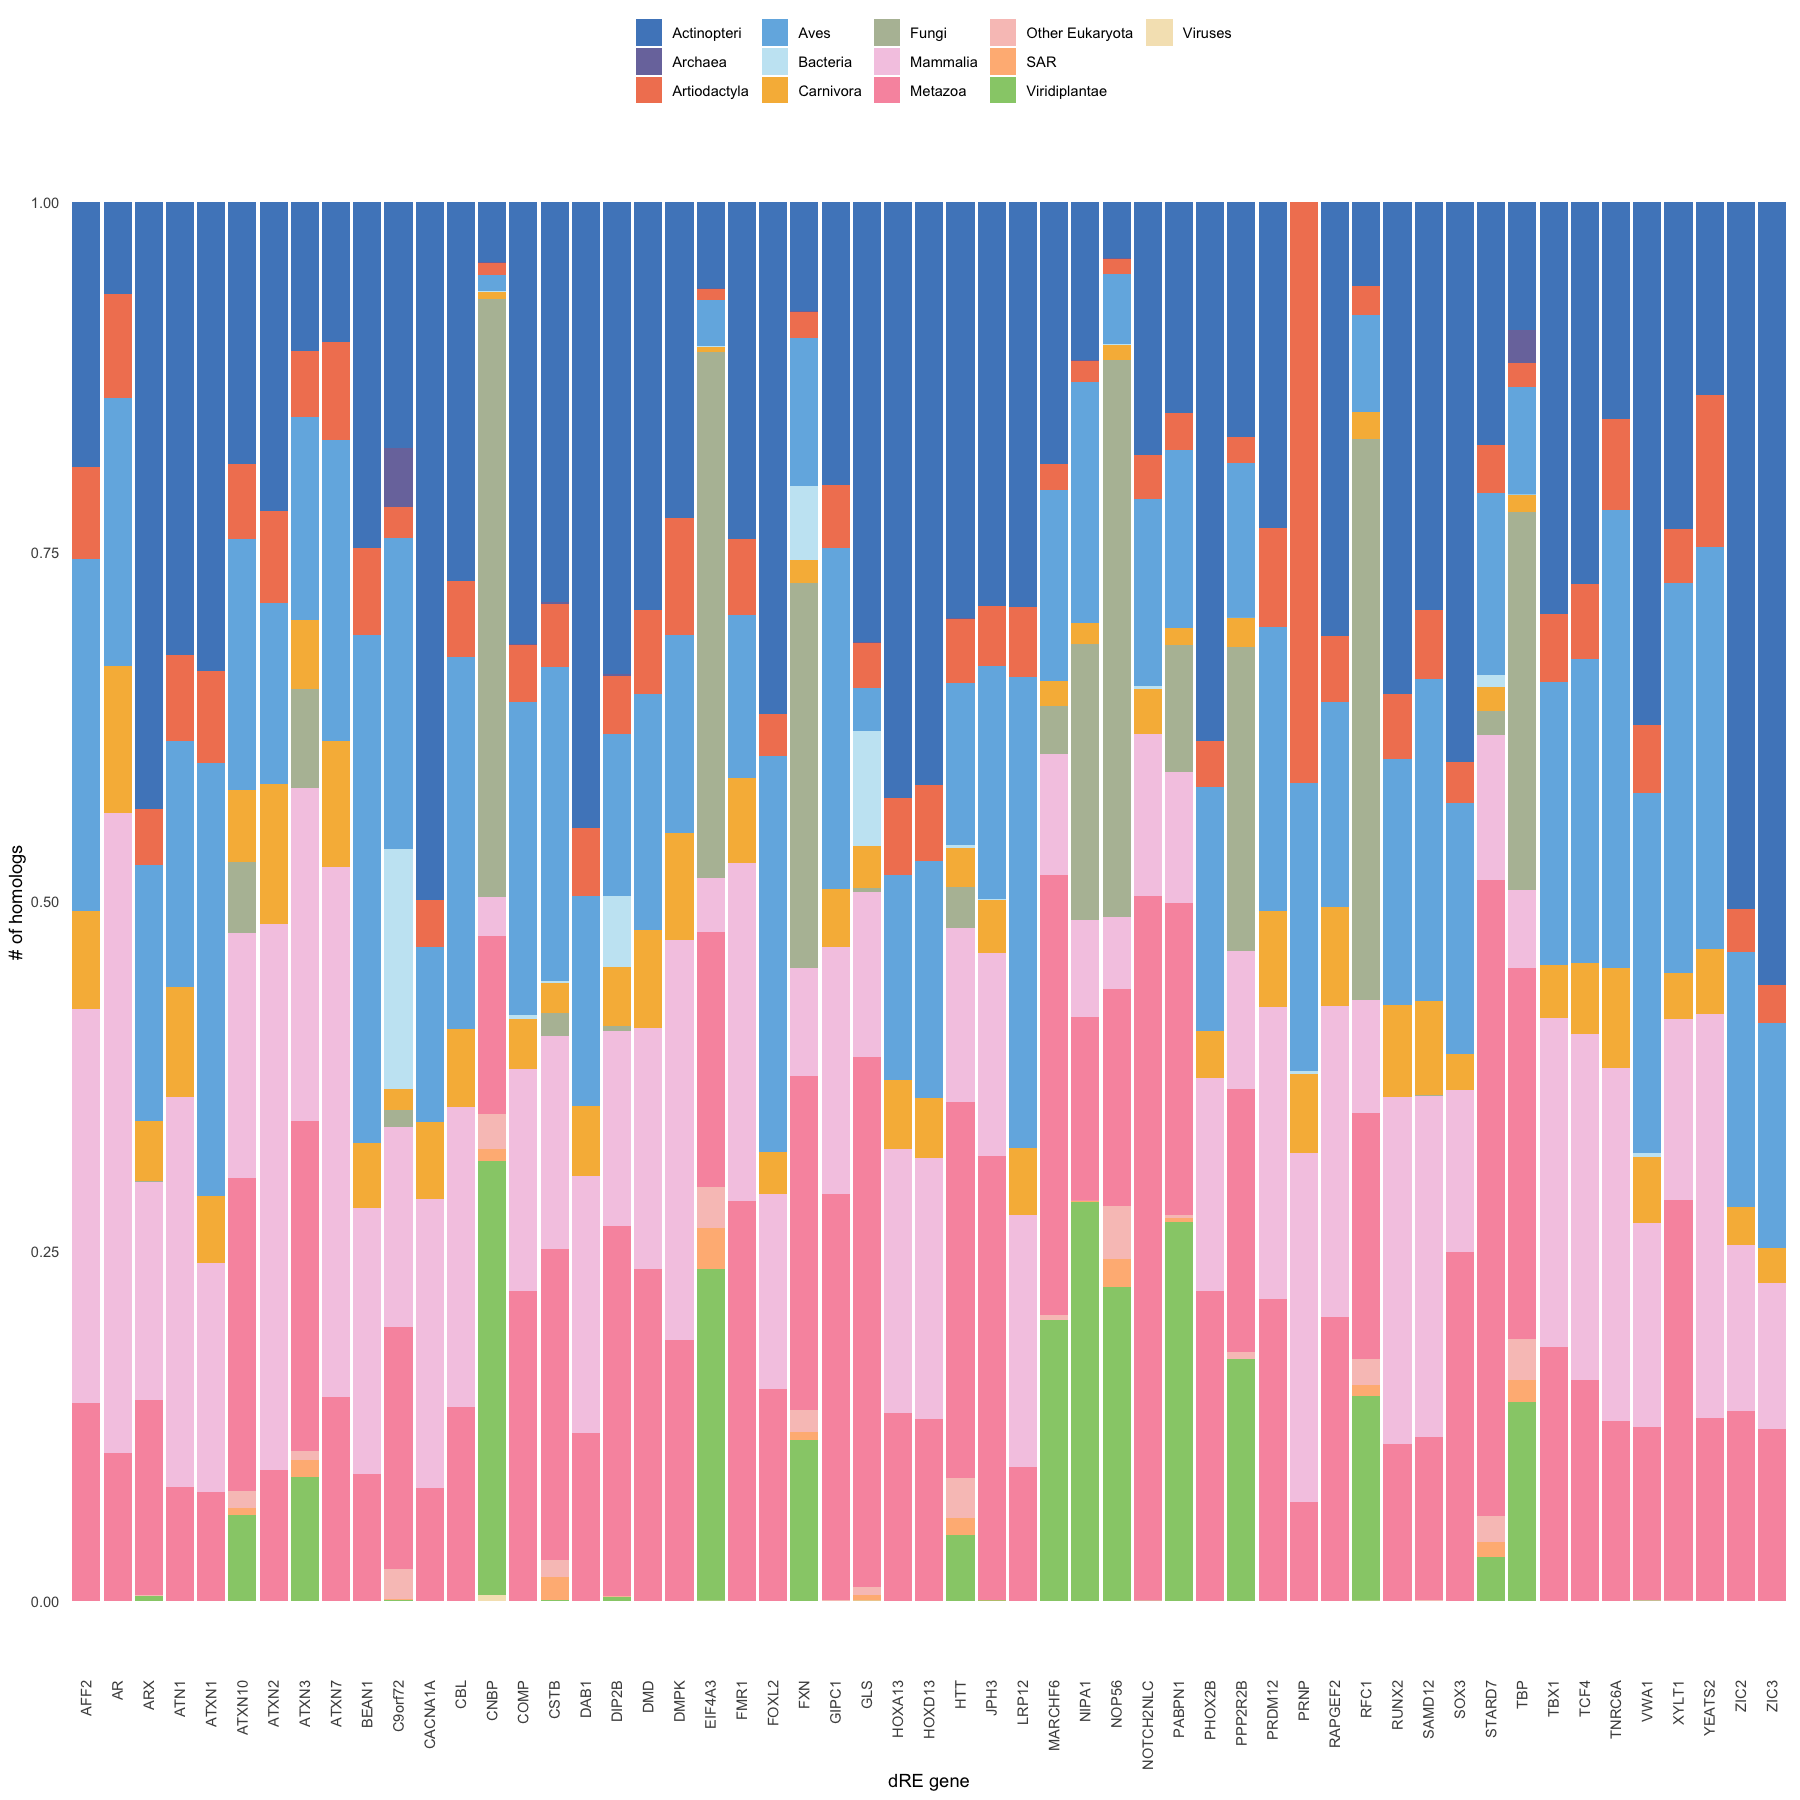

In [9]:
#pull columns of interest and alphabetical order
plot_df=bound
plot_df <- plot_df[, c("gene", "x")]
plot_df <- plot_df[order(plot_df$gene), ]


#choose colors
color_dict <- c('#5088C5', '#7A77AB','#F28360', '#73B5E3'
                ,'#C6E7F4','#f7b846','#b5bea4','#f5cbe4','#f898ae','#f8c5c1','#ffb984','#97cd78',
              '#f5e4be')

#plot and choose plot settings
g=ggplot(data = plot_df, aes(x = gene)) +
  geom_bar(position = "stack",fill = 'gray66') +
  coord_cartesian(clip = "off") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
        legend.title = element_blank(),
        legend.position = "top",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank()) 

#add axis labels
z=g + labs(x = "dRE gene", y = "# of homologs") +
  guides(fill = guide_legend(title = "Group")) +
  theme(legend.position = "top",
        legend.title.align = 0.5)

options(repr.plot.width = 15, repr.plot.height = 15)

z
# Save the plot to a PDF
ggsave("countofhomologsa.pdf", z)

#plot and choose plot settings to show taxonomy
h=ggplot(data = plot_df, aes(x = gene,fill=x)) +
  geom_bar(position = "fill") +
  coord_cartesian(clip = "off") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
        legend.title = element_blank(),
        legend.position = "top",
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank())+ scale_fill_manual(values = color_dict)

#add axis labels
z2=h + labs(x = "dRE gene", y = "# of homologs") +
  guides(fill = guide_legend(title = "Group")) +
  theme(legend.position = "top",
        legend.title.align = 0.5)

options(repr.plot.width = 15, repr.plot.height = 15)

z2


# Save the plot to a PDF
ggsave("countofhomologsb.pdf", z2)

#### Because it is prohibitive to display all individual species observed on a tree, we count up the number of genes for which each taxid is observed and average across the group visualized
(the number of query genes with a homolog per taxonomic group visualized)/(the number of unique taxids within the larger group displayed)=counts shown on tree 

In [11]:
#extract different levels of taxonomy to make a tree. can show more levels than in barchart

extract_pattern <- function(strings) {
  # Initialize an empty vector to store results
  result <- rep(NA, length(strings))
  
  # For each string
  for (i in seq_along(strings)) {
    # If string is NA or doesn't contain the pattern, skip to next string
    if (is.na(strings[i]) || !str_detect(strings[i], "k=Metazoa")) next
    
    # If string contains the pattern, extract it
    result[i] <- str_extract(strings[i], "(?<=c=)[^;]+")
  }
  
  return(result)
}

# Apply the function to the joined$lineage column
x <- extract_pattern(joined$lineage)


#x = str_extract(joined$lineage, "d=Archaea")
x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Archaea"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"k=Fungi"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"k=Metazoa"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"k=Viridiplantae"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Bacteria"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Viruses"), x)
# List of patterns
patterns <- c("p=Apicomplexa","p=Ciliophora","f=Colpodellaceae","o=Colponemida","c=Dinophyceae","g=Loeffela","p=Perkinsozoa","o=Aquavolonida","p=Cercozoa","p=Endomyxa","c=Actinophryidae","c=Bigyra","c=Chrysista","c=Chrysomerophyceae","c=Developea","c=Hyphochytriomycetes","o=Pirsoniales","p=Bacillariophyta","c=Bolidophyceae","c=Chrysophyceae","c=Dictyochophyceae","c=Eustigmatophyceae","c=Olisthodiscophyceae","c=Pelagophyceae","f=Picophagaceae","c=Pinguiophyceae","c=Raphidophyceae","c=Synchromophyceae","c=Synurophyceae")

# Create a regular expression that matches any of the patterns
pattern <- paste(patterns, collapse = "|")

# Extract the pattern from each string
extracted <- str_extract(joined$lineage, pattern)

# If a pattern is extracted, return 'SAR'; otherwise, return the original value
x <- ifelse(!is.na(extracted), "SAR", x)
x
x <- ifelse(is.na(x), str_extract(joined$lineage,"d=Eukaryota"), x)
boundmerged=cbind(merged_df,x)
boundmerged



[1] "Mammalia"            NA                    NA                   
    [4] "Mammalia"            "Mammalia"            "Mammalia"           
    [7] "Mammalia"            "Mammalia"            "Mammalia"           
   [10] "Mammalia"            "Mammalia"            "Mammalia"           
   [13] "Mammalia"            "Mammalia"            "Mammalia"           
   [16] "Mammalia"            "Mammalia"            "Mammalia"           
   [19] "Mammalia"            "Mammalia"            "Mammalia"           
   [22] "Mammalia"            "Mammalia"            "Mammalia"           
   [25] "Mammalia"            "Mammalia"            "Mammalia"           
   [28] "Mammalia"            "Mammalia"            "Mammalia"           
   [31] "Mammalia"            "Mammalia"            "Mammalia"           
   [34] "Mammalia"            "Mammalia"            "Mammalia"           
   [37] "Mammalia"            "Mammalia"            "Mammalia"           
   [40] "Mammalia"            "Mammalia"            "Mammalia"           
   [43] "Mammalia"            "Mammalia"            "Mammalia"           
   [46] "Mammalia"            "Mammalia"            "Mammalia"           
   [49] "Mammalia"            "Mammalia"            "Mammalia"           
   [52] "Mammalia"            "Mammalia"            "Mammalia"           
   [55] "Mammalia"            "Mammalia"            "Mammalia"           
   [58] "Mammalia"            "Mammalia"            "Mammalia"           
   [61] "Mammalia"            "Mammalia"            "Mammalia"           
   [64] "Mammalia"            "Mammalia"            "Mammalia"           
   [67] "Mammalia"            "Mammalia"            "Mammalia"           
   [70] "Mammalia"            "Mammalia"            "Mammalia"           
   [73] "Mammalia"            "Mammalia"            "Mammalia"           
   [76] "Mammalia"            "Mammalia"            "Mammalia"           
   [79] "Mammalia"            "Mammalia"            "Mammalia"           
   [82] "Mammalia"            "Mammalia"            "Mammalia"           
   [85] "Mammalia"            "Mammalia"            "Mammalia"           
   [88] "Mammalia"            "Mammalia"            "Mammalia"           
   [91] "Mammalia"            "Mammalia"            "Mammalia"           
   [94] "Mammalia"            "Mammalia"            "Mammalia"           
   [97] "Mammalia"            "Mammalia"            "Mammalia"           
  [100] "Mammalia"            "Mammalia"            "Mammalia"           
  [103] "Mammalia"            "Mammalia"            "Mammalia"           
  [106] "Mammalia"            "Mammalia"            "Mammalia"           
  [109] "Mammalia"            "Mammalia"            "Mammalia"           
  [112] "Mammalia"            "Mammalia"            "Mammalia"           
  [115] "Mammalia"            "Mammalia"            "Mammalia"           
  [118] "Mammalia"            "Mammalia"            "Mammalia"           
  [121] "Mammalia"            "Mammalia"            "Mammalia"           
  [124] "Mammalia"            "Mammalia"            "Mammalia"           
  [127] "Mammalia"            "Mammalia"            "Mammalia"           
  [130] "Mammalia"            "Mammalia"            "Mammalia"           
  [133] "Mammalia"            "Mammalia"            "Mammalia"           
  [136] "Mammalia"            "Mammalia"            "Mammalia"           
  [139] "Mammalia"            "Mammalia"            "Mammalia"           
  [142] "Mammalia"            "Mammalia"            "Mammalia"           
  [145] "Mammalia"            "Mammalia"            "Mammalia"           
  [148] "Mammalia"            "Mammalia"            "Mammalia"           
  [151] "Mammalia"            "Mammalia"            "Mammalia"           
  [154] "Mammalia"            "Mammalia"            "Mammalia"           
  [157] "Mammalia"            "Mammalia"            "Mammalia"           
  [160] "Mammalia"            "Mammalia"            "Mammalia"           
  [163] 

id      Accession      gene   x              
1         9606 NP_000135.2    FXN    Mammalia       
2        32630 AKI71332.1     FXN    NA             
3        32630 AKI71333.1     FXN    NA             
4         9606 AAA98508.1     FXN    Mammalia       
5         9598 XP_016816418.1 FXN    Mammalia       
6         9595 XP_004048150.1 FXN    Mammalia       
7         9597 XP_003824802.2 FXN    Mammalia       
8         9590 XP_055150380.1 FXN    Mammalia       
9         9600 XP_054357544.1 FXN    Mammalia       
10       60711 XP_007967621.1 FXN    Mammalia       
11       61622 XP_010361265.1 FXN    Mammalia       
12        9555 XP_003911830.1 FXN    Mammalia       
13        9531 XP_011912045.1 FXN    Mammalia       
14       54180 XP_033093041.1 FXN    Mammalia       
15       61621 XP_017728538.1 FXN    Mammalia       
16        9565 XP_025215796.1 FXN    Mammalia       
17        9544 NP_001247670.1 FXN    Mammalia       
18      591936 XP_023069006.2 FXN    Mammalia       
19        9541 Q8HXX9.2       FXN    Mammalia       
20        9541 BAC20589.1     FXN    Mammalia       
21     2715852 XP_017398922.1 FXN    Mammalia       
22       39432 XP_039317470.1 FXN    Mammalia       
23        9515 XP_032146839.1 FXN    Mammalia       
24       39432 XP_003941591.2 FXN    Mammalia       
25        9483 XP_035158805.1 FXN    Mammalia       
26        9544 EHH24154.1     FXN    Mammalia       
27        9606 5KZ5_A         FXN    Mammalia       
28        9470 XP_053430534.1 FXN    Mammalia       
29       30611 XP_003783094.1 FXN    Mammalia       
30     1230840 XP_007942528.1 FXN    Mammalia       
⋮      ⋮       ⋮              ⋮      ⋮              
268797  284812 Q09888         ATXN10 k=Fungi        
268798    9913 Q2TBW0         ATXN10 Mammalia       
268799    9541 Q4R4Y2         ATXN10 Mammalia       
268800   44689 Q55EI6         ATXN10 d=Eukaryota    
268801    8364 Q5FVB0         ATXN10 Amphibia       
268802    9601 Q5RE06         ATXN10 Mammalia       
268803  284592 Q6BKV2         ATXN10 k=Fungi        
268804  284593 Q6FMC0         ATXN10 k=Fungi        
268805    9823 Q6QAP4         ATXN10 Mammalia       
268806  284811 Q75EM1         ATXN10 k=Fungi        
268807   10090 Q8BWX1         ATXN10 Mammalia       
268808   39947 Q8H050         ATXN10 k=Viridiplantae
268809   10116 Q9ER24         ATXN10 Mammalia       
268810    9606 Q9UBB4         ATXN10 Mammalia       
268811 1097556 R4X7N6         ATXN10 k=Fungi        
268812 1168221 R7Z386         ATXN10 k=Fungi        
268813  653667 S9VU60         ATXN10 k=Fungi        
268814  419612 S9X9E2         ATXN10 Mammalia       
268815   32264 T1JVS2         ATXN10 Arachnida      
268816   32264 T1K8K0         ATXN10 Arachnida      
268817    6087 T2M4A5         ATXN10 Hydrozoa       
268818    8840 U3ISD6         ATXN10 Aves           
268819   59894 U3JJK9         ATXN10 Aves           
268820  225164 V3ZW41         ATXN10 Gastropoda     
268821    3885 V7BRV4         ATXN10 k=Viridiplantae
268822    3885 V7BVY9         ATXN10 k=Viridiplantae
268823   13333 W1PT42         ATXN10 k=Viridiplantae
268824  871575 W1QEY8         ATXN10 k=Fungi        
268825    4792 W2KFC6         ATXN10 d=Eukaryota    
268826 1382522 W6MN89         ATXN10 k=Fungi

In [12]:
#counts per taxid
p=boundmerged%>%
  group_by(id) %>%
  summarise(n_unique_gene = n_distinct(gene))
#pull taxonomic group for each unique taxid
q=boundmerged %>%
  group_by(id) %>%
  summarise(unique_x = unique(x))
#pull tables together with corresponding values
merged_df_full <- merge(p, q, by = "id", all = TRUE)
merged_df_full


#average the homolog counts within the same taxonomic groups (should be a more accurate metric of how many hits each species within that group had)
avg <- aggregate(n_unique_gene ~ unique_x, merged_df_full, mean)
avg



write.csv(merged_df_full,"fulldf.csv") #available on Zenodo



id      n_unique_gene unique_x   
1      41    1             d=Bacteria 
2     166    1             d=Bacteria 
3     205    1             d=Bacteria 
4     262    1             d=Bacteria 
5     263    1             d=Bacteria 
6     286    1             d=Bacteria 
7     294    1             d=Bacteria 
8     337    1             d=Bacteria 
9     384    1             d=Bacteria 
10    463    1             d=Bacteria 
11    488    1             d=Bacteria 
12    536    1             d=Bacteria 
13    562    1             d=Bacteria 
14    571    1             d=Bacteria 
15    621    1             d=Bacteria 
16    648    1             d=Bacteria 
17    654    2             d=Bacteria 
18    662    2             d=Bacteria 
19    666    1             d=Bacteria 
20    674    1             d=Bacteria 
21    675    1             d=Bacteria 
22    780    1             d=Bacteria 
23    781    1             d=Bacteria 
24    853    1             d=Bacteria 
25    885    1             d=Bacteria 
26    954    1             d=Bacteria 
27    971    1             d=Bacteria 
28   1051    1             d=Bacteria 
29   1219    1             d=Bacteria 
30   1236    1             d=Bacteria 
⋮    ⋮       ⋮             ⋮          
8110 2972120  6            k=Fungi    
8111 2972122  3            k=Fungi    
8112 2972123  3            k=Fungi    
8113 2978355  5            k=Fungi    
8114 2978356  6            k=Fungi    
8115 2978357  7            k=Fungi    
8116 2978358  5            k=Fungi    
8117 2978359  5            k=Fungi    
8118 2978360  5            k=Fungi    
8119 2991368 48            k=Metazoa  
8120 2993447  1            d=Bacteria 
8121 2994271  2            Actinopteri
8122 2994473  1            d=Bacteria 
8123 2994555  1            d=Bacteria 
8124 2994821  1            Actinopteri
8125 2995304  1            d=Bacteria 
8126 2995305  1            d=Bacteria 
8127 2995306  1            d=Bacteria 
8128 3003414  7            k=Fungi    
8129 3003415  6            k=Fungi    
8130 3003416  6            k=Fungi    
8131 3003417  5            k=Fungi    
8132 3031751  7            k=Fungi    
8133 3034132 52            Actinopteri
8134 3040453  1            Actinopteri
8135 3040454  1            Actinopteri
8136 3042687  1            d=Bacteria 
8137 3042688  1            d=Bacteria 
8138 3042689  1            d=Bacteria 
8139      NA 16            NA

unique_x            n_unique_gene
1  Actinopteri          7.041260    
2  Amphibia            19.576923    
3  Anthozoa            24.125000    
4  Appendicularia      17.000000    
5  Arachnida           14.265625    
6  Ascidiacea           7.200000    
7  Asteroidea          25.000000    
8  Aves                39.497573    
9  Bivalvia            15.068966    
10 Branchiopoda         4.615385    
11 Calcarea             1.000000    
12 Cephalopoda         13.000000    
13 Cestoda             11.500000    
14 Chilopoda            1.000000    
15 Chondrichthyes      34.875000    
16 Chromadorea         12.577465    
17 Cladistia           35.333333    
18 Clitellata           5.000000    
19 Collembola          21.000000    
20 Crinoidea           32.000000    
21 d=Archaea            1.200000    
22 d=Bacteria           1.095455    
23 d=Eukaryota          4.321429    
24 d=Viruses            1.000000    
25 Demospongiae         5.600000    
26 Diplopoda            1.000000    
27 Echinoidea          12.250000    
28 Enoplea             16.437500    
29 Enteropneusta       11.666667    
30 Eurotatoria         21.000000    
⋮  ⋮                   ⋮            
43 k=Metazoa           32.457143    
44 k=Viridiplantae      8.091489    
45 Lepidosauria        25.692308    
46 Leptocardii         36.000000    
47 Lingulata           33.000000    
48 Malacostraca        14.500000    
49 Mammalia            25.662338    
50 Merostomata         16.000000    
51 Monogenea            4.000000    
52 Myxini               1.666667    
53 Myxozoa              2.333333    
54 Ophiuroidea          1.000000    
55 Ostracoda           17.333333    
56 Palaeacanthocephala  4.500000    
57 Pararotatoria       15.000000    
58 Pauropoda            1.000000    
59 Polychaeta          13.222222    
60 Polyplacophora       1.000000    
61 Priapulimorpha      22.000000    
62 Pycnogonida          3.285714    
63 Remipedia            1.000000    
64 Rhabditophora        6.250000    
65 Rhynchonellata       3.000000    
66 SAR                  2.913978    
67 Symphyla             1.000000    
68 Tentaculata          1.000000    
69 Thecostraca         16.333333    
70 Trematoda           12.428571    
71 Udeonychophora       2.000000    
72 Uniplacotomia       18.500000

### Export result tables to make tree with phyloT and visualize in iTOL

In [13]:
#write result of counts so that it can be used in tree visualization with phyloT
write.csv(avg,"finaltree.csv") #available on Zenodo
#phyloT does not recognize 'SAR' as scientific name, replaced name with taxid 2698737 before uploading to phyloT

### The code above uses the full set of results, but we also wanted to make tree visualizations for some subsets of the results based on the length of the repeats counted in those hits.  The code below uses the same process and logic as above but different inputs and pulls different levels of taxonomy

#### Homolog hits that match or exceed the number of amino acid repeats ever found in healthy humans

In [14]:
#read in count file from blast and format
count=read.csv("taxid_exceeds_healthy_human_max_20230821.csv") #on Zenodo
colnames(count) <- c('id','name','count')

#pull out the lineage information for taxid's in the count file and make a table with taxid, count, and lineage
lineage=filter(tax2, id %in% count$id)
joined=left_join(count, lineage, by = "id")   
joined


#pull out the desired lineage information for different taxonomic levels
extract_pattern <- function(string) {
  # Check if string contains c=Mammalia or c=Hyperoartia
  if(str_detect(string, "c=(Mammalia|Hyperoartia)")) {
    # If the pattern exists, extract the desired value
    return(str_extract(string, "(?<=o=)[^;]+"))
  } else {
    # If the pattern doesn't exist, return NA
    return(NA)
  }
}

# Apply the function to the joined$lineage column
x <- sapply(joined$lineage, extract_pattern)
#extract other lineage information
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=c=)[^;]+"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=p=)[^;]+"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=k=)[^;]+"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=d=)[^;]+"), x)

#add this extracted information to the table
bound=cbind(joined[,1:3],x)
bound


#average the homolog counts within the same taxonomic groups (should be a more accurate metric of how many hits each species within that group had)
avg <- aggregate(count ~ x, bound, mean)
avg


#write result of counts so that it can be used in tree visualization with phyloT
write.csv(avg,"ndREhitsav_exceeds_special.csv") #on Zenodo

id      name                             count <NA>   
1     9261  Australian echidna               5       9261 
2    33562  monito del monte                 4      33562 
3    38626  koala                            4      38626 
4     9305  Tasmanian devil                  4       9305 
5     9337  common brushtail                 4       9337 
6    38775  yellow-footed antechinus         4      38775 
7     7757  sea lamprey                      3       7757 
8    29139  common wombat                    3      29139 
9    59472  Kuhl's pipistrelle               3      59472 
10    9662  Eurasian badger                  3       9662 
11  214514  Pacific pocket mouse             3     214514 
12   13616  gray short-tailed opossum        3      13616 
13   36803  cinereus shrew                   3      36803 
14  191870  Agile Gracile Mouse Opossum      3     191870 
15    9615  dog                              2       9615 
16  591936  Ugandan red Colobus              2     591936 
17  109478  Brandt's bat                     2     109478 
18   89248  Equus quagga                     2      89248 
19   30640  gray squirrel                    2      30640 
20  132908  large flying fox                 2     132908 
21  391180  Enhydra lutris kenyoni           2     391180 
22    8957  Northern goshawk                 2       8957 
23    9644  brown bear                       2       9644 
24    9657  Eurasian river otter             2       9657 
25    9796  horse                            2       9796 
26    9258  platypus                         2       9258 
27   10181  naked mole-rat                   2      10181 
28    9407  Egyptian rousette                2       9407 
29   59479  greater horseshoe bat            2      59479 
30   36723  ermine                           2      36723 
⋮   ⋮       ⋮                                ⋮     ⋮      
332   28737 Cape elephant shrew              1       28737
333   28697 Cepphus grylle                   1       28697
334   28689 razorbill                        1       28689
335   27675 southern two-toed sloth          1       27675
336   27622 Pallas's mastiff bat             1       27622
337   13746 common murre                     1       13746
338   13146 budgerigar                       1       13146
339   13013 North African catfish            1       13013
340   30464 Nothoprocta perdicaria           1       30464
341   31033 torafugu                         1       31033
342   37623 Ostrea edulis                    1       37623
343   32264 two-spotted spider mite          1       32264
344   37083 Little blue penguin              1       37083
345   37081 Magellanic penguin               1       37081
346   37079 Pelecanoides urinatrix           1       37079
347   37042 Fregata magnificens              1       37042
348   36300 Dalmatian pelican                1       36300
349   35670 Indian cobra                     1       35670
350   35658 southern multimammate mouse      1       35658
351   35019 Thamnophis sirtalis              1       35019
352   35005 Western terrestrial garter snake 1       35005
353   34886 Steller sea lion                 1       34886
354   34884 northern fur seal                1       34884
355   34773 American shad                    1       34773
356   34765 Oikopleura dioica                1       34765
357   33581 hamerkop                         1       33581
358   33528 western mosquitofish             1       33528
359   32536 cheetah                          1       32536
360   32473 Monterrey platyfish              1       32473
361 2939378 Oenanthe melanoleuca             1     2939378
    lineage                                                                                                                                                       
1   name=Tachyglossus aculeatus; g=Tachyglossus; f=Tachyglossidae; o=Monotremata; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                  
2   name=Dromiciops 

id     
name=Tachyglossus aculeatus; g=Tachyglossus; f=Tachyglossidae; o=Monotremata; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                     9261 
name=Dromiciops gliroides; g=Dromiciops; f=Microbiotheriidae; o=Microbiotheria; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                  33562 
name=Phascolarctos cinereus; g=Phascolarctos; f=Phascolarctidae; o=Diprotodontia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                38626 
name=Sarcophilus harrisii; g=Sarcophilus; f=Dasyuridae; o=Dasyuromorphia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                         9305 
name=Trichosurus vulpecula; g=Trichosurus; f=Phalangeridae; o=Diprotodontia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                      9337 
name=Antechinus flavipes; g=Antechinus; f=Dasyuridae; o=Dasyuromorphia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                          38775 
name=Petromyzon marinus; g=Petromyzon; f=Petromyzontidae; o=Petromyzontiformes; c=Hyperoartia; p=Chordata; k=Metazoa; d=Eukaryota                                7757 
name=Vombatus ursinus; g=Vombatus; f=Vombatidae; o=Diprotodontia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                29139 
name=Pipistrellus kuhlii; g=Pipistrellus; f=Vespertilionidae; o=Chiroptera; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                      59472 
name=Meles meles; g=Meles; f=Mustelidae; o=Carnivora; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                             9662 
name=Perognathus longimembris pacificus; s=Perognathus longimembris; g=Perognathus; f=Heteromyidae; o=Rodentia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota 214514 
name=Monodelphis domestica; g=Monodelphis; f=Didelphidae; o=Didelphimorphia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                     13616 
name=Sorex cinereus; g=Sorex; f=Soricidae; o=Eulipotyphla; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                       36803 
name=Gracilinanus agilis; g=Gracilinanus; f=Didelphidae; o=Didelphimorphia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                     191870 
name=Canis lupus familiaris; s=Canis lupus; g=Canis; f=Canidae; o=Carnivora; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                      9615 
name=Piliocolobus tephrosceles; g=Piliocolobus; f=Cercopithecidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                  591936 
name=Myotis brandtii; g=Myotis; f=Vespertilionidae; o=Chiroptera; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                               109478 
name=Equus quagga; g=Equus; f=Equidae; o=Perissodactyla; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                         89248 
name=Sciurus carolinensis; g=Sciurus; f=Sciuridae; o=Rodentia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                   30640 
name=Pteropus vampyrus; g=Pteropus; f=Pteropodidae; o=Chiroptera; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                               132908 
name=Enhydra lutris kenyoni; s=Enhydra lutris; g=Enhydra; f=Mustelidae; o=Carnivora; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                            391180 
name=Accipiter gentilis; g=Accipiter; f=Accipitridae; o=Accipitriformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                                              8957 
name=Ursus arctos; g=Ursus; f=Ursidae; o=Carnivora; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                               9644 
name=Lutra lutra; g=Lutra; f=Mustelidae; o=Carnivora; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                   

x                  count   
1  Actinopteri        1.000000
2  Anthozoa           1.000000
3  Appendicularia     1.000000
4  Arachnida          1.000000
5  Artiodactyla       1.000000
6  Ascidiacea         1.000000
7  Asteroidea         1.000000
8  Aves               1.014599
9  Bivalvia           1.000000
10 Carnivora          1.379310
11 Chiroptera         1.666667
12 Chondrichthyes     1.000000
13 Dasyuromorphia     4.000000
14 Didelphimorphia    3.000000
15 Diprotodontia      3.000000
16 Echinoidea         1.000000
17 Enteropneusta      1.000000
18 Eulipotyphla       2.000000
19 Gastropoda         1.000000
20 Insecta            1.000000
21 Lagomorpha         1.000000
22 Lepidosauria       1.076923
23 Leptocardii        1.000000
24 Macroscelidea      1.000000
25 Microbiotheria     4.000000
26 Monotremata        3.500000
27 Perissodactyla     1.666667
28 Petromyzontiformes 3.000000
29 Pholidota          1.500000
30 Pilosa             1.000000
31 Primates           1.100000
32 Rhabditophora      1.000000
33 Rodentia           1.277778
34 Tubulidentata      1.000000

#### Homolog hits that match or exceed the number of amino acid repeats found in the human refseq protein

In [15]:
#read in count file from blast and format
count=read.csv("taxid_ndREhits_20230802.csv") #available on Zenodo
colnames(count) <- c('id','name','count')

#pull out the lineage information for taxid's in the count file and make a table with taxid, count, and lineage
lineage=filter(tax2, id %in% count$id)
joined=left_join(count, lineage, by = "id")   
joined


#pull out the desired lineage information for different taxonomic levels
extract_pattern <- function(string) {
  # Check if string contains c=Mammalia or c=Hyperoartia
  if(str_detect(string, "c=(Mammalia|Hyperoartia)")) {
    # If the pattern exists, extract the desired value
    return(str_extract(string, "(?<=o=)[^;]+"))
  } else {
    # If the pattern doesn't exist, return NA
    return(NA)
  }
}

# Apply the function to the joined$lineage column
x <- sapply(joined$lineage, extract_pattern)
#extract other lineage information
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=c=)[^;]+"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=p=)[^;]+"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=k=)[^;]+"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=d=)[^;]+"), x)

#add this extracted information to the table
bound=cbind(joined[,1:3],x)
bound


#average the homolog counts within the same taxonomic groups (should be a more accurate metric of how many hits each species within that group had)
avg <- aggregate(count ~ x, bound, mean)
avg


#write result of counts so that it can be used in tree visualization with phyloT
write.csv(avg,"ndREhitsav_matches_special.csv") #on zenodo


id     name                         count
1     42254 European shrew               13   
2     10041 white-footed mouse           13   
3    105255 banner-tailed kangaroo rat   12   
4     36803 cinereus shrew               12   
5      9597 pygmy chimpanzee             12   
6    109475 white-toothed pygmy shrew    12   
7     60711 green monkey                 12   
8      9999 Arctic ground squirrel       11   
9    591936 Ugandan red Colobus          11   
10     9601 Sumatran orangutan           11   
11    30640 gray squirrel                11   
12    59472 Kuhl's pipistrelle           11   
13     9925 goat                         11   
14    51337 lesser Egyptian jerboa       11   
15    27622 Pallas's mastiff bat         10   
16   130825 black-lipped pika            10   
17    29078 big brown bat                10   
18     9483 white-tufted-ear marmoset    10   
19   214514 Pacific pocket mouse         10   
20     9986 rabbit                       10   
21     9544 Rhesus monkey                10   
22    10129 European woodmouse           10   
23     9541 crab-eating macaque          10   
24     9598 chimpanzee                   10   
25   286419 dingo                        10   
26    10090 house mouse                   9   
27     9669 domestic ferret               9   
28     9615 dog                           9   
29     9644 brown bear                    9   
30     9694 tiger                         9   
⋮    ⋮      ⋮                            ⋮    
1030  90675 false flax                   1    
1031  90382 Heck's macaque               1    
1032  13427 chicory                      1    
1033  13443 coffee                       1    
1034  89379 Malagasy giant rat           1    
1035  88217 Carniolan honeybee           1    
1036  13632 common green bottle fly      1    
1037  85310 southern green stink bug     1    
1038  95602 Chinese mitten crab          1    
1039  13068 European earwig              1    
1040  96939 riverbank grape              1    
1041  98144 white-throated Oxylabes      1    
1042   9132 Australian magpie            1    
1043 110676 boat-billed heron            1    
1044   9163 hooded pitta                 1    
1045   9176 chestnut-crowned babbler     1    
1046 107270 white-tailed rat             1    
1047   9315 tammar wallaby               1    
1048   9400 Indian short-nosed fruit bat 1    
1049 104688 olive fruit fly              1    
1050   9515 Brown-capped capuchin        1    
1051   9646 Giant panda                  1    
1052   9704 California sealion           1    
1053 103775 fruit fly                    1    
1054 102211 wax gourd                    1    
1055 102107 Japanese apricot             1    
1056  10085 Gambian giant pouched rat    1    
1057  10116 Rat                          1    
1058  98964 northern cardinal            1    
1059   2711 sweet orange                 1    
     lineage                                                                                                                                                       
1    name=Sorex araneus; g=Sorex; f=Soricidae; o=Eulipotyphla; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                      
2    name=Peromyscus leucopus; g=Peromyscus; f=Cricetidae; o=Rodentia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                              
3    name=Dipodomys spectabilis; g=Dipodomys; f=Heteromyidae; o=Rodentia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                           
4    name=Sorex cinereus; g=Sorex; f=Soricidae; o=Eulipotyphla; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                     
5    name=Pan paniscus; g=Pan; f=Hominidae; o=Primates; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                             
6    name=Suncus etruscus; g=Suncus; f=Soricidae; o=Eulipotyphla; c=Mammalia; p=Chordata; k=Metazoa; d=Euka

id     name                         count x            
1     42254 European shrew               13    Eulipotyphla 
2     10041 white-footed mouse           13    Rodentia     
3    105255 banner-tailed kangaroo rat   12    Rodentia     
4     36803 cinereus shrew               12    Eulipotyphla 
5      9597 pygmy chimpanzee             12    Primates     
6    109475 white-toothed pygmy shrew    12    Eulipotyphla 
7     60711 green monkey                 12    Primates     
8      9999 Arctic ground squirrel       11    Rodentia     
9    591936 Ugandan red Colobus          11    Primates     
10     9601 Sumatran orangutan           11    Primates     
11    30640 gray squirrel                11    Rodentia     
12    59472 Kuhl's pipistrelle           11    Chiroptera   
13     9925 goat                         11    Artiodactyla 
14    51337 lesser Egyptian jerboa       11    Rodentia     
15    27622 Pallas's mastiff bat         10    Chiroptera   
16   130825 black-lipped pika            10    Lagomorpha   
17    29078 big brown bat                10    Chiroptera   
18     9483 white-tufted-ear marmoset    10    Primates     
19   214514 Pacific pocket mouse         10    Rodentia     
20     9986 rabbit                       10    Lagomorpha   
21     9544 Rhesus monkey                10    Primates     
22    10129 European woodmouse           10    Rodentia     
23     9541 crab-eating macaque          10    Primates     
24     9598 chimpanzee                   10    Primates     
25   286419 dingo                        10    Carnivora    
26    10090 house mouse                   9    Rodentia     
27     9669 domestic ferret               9    Carnivora    
28     9615 dog                           9    Carnivora    
29     9644 brown bear                    9    Carnivora    
30     9694 tiger                         9    Carnivora    
⋮    ⋮      ⋮                            ⋮     ⋮            
1030  90675 false flax                   1     Magnoliopsida
1031  90382 Heck's macaque               1     Primates     
1032  13427 chicory                      1     Magnoliopsida
1033  13443 coffee                       1     Magnoliopsida
1034  89379 Malagasy giant rat           1     Rodentia     
1035  88217 Carniolan honeybee           1     Insecta      
1036  13632 common green bottle fly      1     Insecta      
1037  85310 southern green stink bug     1     Insecta      
1038  95602 Chinese mitten crab          1     Malacostraca 
1039  13068 European earwig              1     Insecta      
1040  96939 riverbank grape              1     Magnoliopsida
1041  98144 white-throated Oxylabes      1     Aves         
1042   9132 Australian magpie            1     Aves         
1043 110676 boat-billed heron            1     Aves         
1044   9163 hooded pitta                 1     Aves         
1045   9176 chestnut-crowned babbler     1     Aves         
1046 107270 white-tailed rat             1     Rodentia     
1047   9315 tammar wallaby               1     Diprotodontia
1048   9400 Indian short-nosed fruit bat 1     Chiroptera   
1049 104688 olive fruit fly              1     Insecta      
1050   9515 Brown-capped capuchin        1     Primates     
1051   9646 Giant panda                  1     Carnivora    
1052   9704 California sealion           1     Carnivora    
1053 103775 fruit fly                    1     Insecta      
1054 102211 wax gourd                    1     Magnoliopsida
1055 102107 Japanese apricot             1     Magnoliopsida
1056  10085 Gambian giant pouched rat    1     Rodentia     
1057  10116 Rat                          1     Rodentia     
1058  98964 northern cardinal            1     Aves         
1059   2711 sweet orange                 1     Magnoliopsida

x                     count   
1  Actinopteri           2.107143
2  Agaricomycetes        1.000000
3  Amphibia              2.000000
4  Anthozoa              2.000000
5  Arachnida             1.705882
6  Artiodactyla          4.487805
7  Ascidiacea            2.000000
8  Asteroidea            2.000000
9  Aves                  1.805556
10 Bivalvia              1.800000
11 Branchiopoda          3.000000
12 Carnivora             5.043478
13 Cephalopoda           1.333333
14 Chilopoda             1.000000
15 Chiroptera            6.647059
16 Chondrichthyes        1.909091
17 Chordata              2.052632
18 Chromadorea           1.437500
19 Cingulata             5.000000
20 Cladistia             3.000000
21 Dasyuromorphia        7.500000
22 Dermoptera            4.000000
23 Didelphimorphia       7.000000
24 Diprotodontia         6.500000
25 Dothideomycetes       1.000000
26 Echinoidea            2.000000
27 Eulipotyphla          9.000000
28 Exobasidiomycetes     1.000000
29 Gastropoda            1.666667
30 Hexanauplia           1.500000
31 Holothuroidea         1.500000
32 Hydrozoa              2.000000
33 Insecta               1.754839
34 Lagomorpha            8.333333
35 Lepidosauria          2.500000
36 Leptocardii           2.000000
37 Macroscelidea         2.000000
38 Magnoliopsida         1.000000
39 Malacostraca          1.111111
40 Mammalia              2.166667
41 Marchantiopsida       1.000000
42 Merostomata           1.000000
43 Microbiotheria        7.000000
44 Monotremata           6.000000
45 Perissodactyla        4.750000
46 Petromyzontiformes    7.000000
47 Pezizomycetes         1.000000
48 Pholidota             7.000000
49 Pilosa                8.000000
50 Pinopsida             1.000000
51 Polychaeta            1.000000
52 Primates              6.324324
53 Proboscidea           3.000000
54 Rodentia              5.978723
55 Scandentia            2.000000
56 Schizosaccharomycetes 1.000000
57 Sirenia               5.000000
58 Trematoda             1.500000

### Plot species-level information for homologs with amino acid repeat lengths that exceed the maximum repeat length seen in healthy humans.



In [26]:
count=read.csv("binarized_taxid_exceeds_healthy_human_max_20230821.csv",header=TRUE) #available on Zenodo
colnames(count)[1]<- "name"


#pull out the lineage information for taxid's in the count file and make a table with taxid, count, and lineage
lineage=filter(tax2, id %in% count$id)
joined=left_join(count, lineage, by = "id")   
joined


#pull out the desired lineage information for different taxonomic levels
extract_pattern <- function(string) {
  # Check if string contains c=Mammalia 
  if(str_detect(string, "c=Mammalia")) {
    # If the pattern exists, extract the desired value
    return(str_extract(string, "(?<=o=)[^;]+"))
  } else {
    # If the pattern doesn't exist, return NA
    return(NA)
  }
}

# Apply the function to the joined$lineage column
x <- sapply(joined$lineage, extract_pattern)
#extract other lineage information
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=c=)[^;]+"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=p=)[^;]+"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=k=)[^;]+"), x)
x <- ifelse(is.na(x), str_extract(joined$lineage,"(?<=d=)[^;]+"), x)

#add this extracted information to the table
bound=cbind(joined[,1:18],x)
bound
bound=bound[,2:19]

write.csv(bound,'~/Desktop/binarizedperspecies0824.csv')

#some taxonomic groups that only contained a few species were collapsed into larger groups for plotting:
#column x from the above table was copied to a new column named 'groups'. Didelphimorphia, Diprotodontia, Microbiotheria, and Dasyuromorphia marsupials were grouped into 'mar'.
#Monotremata, Macroscelidea, Pholidota, Appendicularia, Tubulidentata, Enteropneusta, Ascidiacea, Lagomorpha, Hyperoartia, Pilosa, and Arachnida were grouped into 'other'.
#Asteroidea and Echinoidea were grouped into 'ech'. Gastropoda, Rhabditophora, Bivalvia were collapsed into spiralia. 

heat=read.csv("~/Desktop/binarizedperspecies0824_groups.csv",header=TRUE) #available on Zenodo


categories <- heat[,20]

                 # Create the colors for the heatmap

category_colors <- c(
  'Aves'='#399886', 
  'mar'='#4F88C6', 
  'Actinopteri'='#F6B846', 
  'other'='#73B5E3', 
  'Carnivora'='#7A77AB', 
  'Eulipotyphla'='#97CD78', 
  'Leptocardii'='#B5BEA4', 
  'Primates'='#C6E6F3', 
  'Chiroptera'='#D4BEDD', 
  'Perissodactyla'='#F1835F', 
  'Artiodactyla'='#F597AD', 
  'Rodentia'='#F5E4BE', 
  'ech'='#596F74', 
  'Chondrichthyes'='#F8C5C1', 
  'Lepidosauria'='#FFB984', 
  'spiralia'='#D1EADF', 
  'Insecta'='#B6C8D4', 
  'Anthozoa'='#F3CBE0'
)


unique_categories <- unique(categories)
category_values <- 2:(length(unique_categories) + 1)  # values start from 2

# Replace 1s in bound with category-specific values
for (i in 1:length(unique_categories)) {
  cat <- unique_categories[i]
  heat[heat == 1 & categories == cat] <- category_values[i]
}
color_palette <- c("#F4FBFF", category_colors[unique_categories])


heat <- heat[order(heat$g), ]

plot=apply(heat[,2:18], 2, as.numeric)
rownames(plot) <- heat$name
plot <- plot[apply(plot, 1, function(row) any(row != 0)), ]

                   
                   
 # Save as SVG
svglite(file="heatmap_output.svg", width=15, height=40)
heatmap.2(plot, 
          dendrogram = "none", 
          Rowv = NA, 
          Colv = TRUE, 
          col = color_palette,
          trace = "none", 
          notecol="black",  
          density.info = "none",
          scale = "none",key=F)
dev.off()


name                            AR ARX ATN1 CACNA1A COMP FOXL2 HOXA13 JPH3
1   Acropora millepora              0  0   0    0       1    0     0      0   
2   Adelie penguin                  0  0   0    0       1    0     0      0   
3   Aegotheles bennettii            0  0   0    0       1    0     0      0   
4   Aeolian wall lizard             0  0   0    0       0    0     0      0   
5   Agile Gracile Mouse Opossum     0  1   0    0       0    1     0      0   
6   Alaska blackfish                0  0   0    0       1    0     0      0   
7   Amami-oshima island spiny rat   0  0   0    0       0    0     0      0   
8   Amazon molly                    0  0   0    0       1    0     0      0   
9   Amazona guildingii              0  0   0    0       1    0     0      0   
10  American black bear             0  0   1    0       0    0     0      0   
11  American crow                   0  0   0    0       1    0     0      0   
12  American mink                   0  0   0    0       0    0     0      0   
13  American shad                   0  0   0    0       1    0     0      0   
14  Anna's hummingbird              0  0   0    0       1    0     0      0   
15  Aquila chrysaetos chrysaetos    0  0   0    0       1    0     0      0   
16  Arctic char                     0  0   0    0       1    0     0      0   
17  Arctic ground squirrel          0  0   0    0       0    0     0      0   
18  Atlantic cod                    0  0   0    0       1    0     0      0   
19  Atlantic herring                0  0   0    0       1    0     0      0   
20  Atlantic salmon                 0  0   0    0       1    0     0      0   
21  Atlantic yellow-nosed albatross 0  0   0    0       1    0     0      0   
22  Australian echidna              0  0   0    0       1    0     0      0   
23  Australian little penguin       0  0   0    0       1    0     0      0   
24  Barn owl                        0  0   0    0       1    0     0      0   
25  Belcher's lancelet              0  0   0    0       1    0     0      0   
26  Bengalese finch                 0  0   0    0       0    0     0      0   
27  Bolivian squirrel monkey        0  0   0    0       0    0     0      0   
28  Bornean orangutan               0  0   0    0       0    0     0      0   
29  Brandt's bat                    1  0   0    0       0    0     0      0   
30  Buceros rhinoceros silvestris   0  0   0    0       1    0     0      0   
⋮   ⋮                               ⋮  ⋮   ⋮    ⋮       ⋮    ⋮     ⋮      ⋮   
332 southern two-toed sloth         0  0   0    0       0    0     1      0   
333 speckled mousebird              0  0   0    0       1    0     0      0   
334 starlet sea anemone             0  0   0    0       1    0     0      0   
335 striped catfish                 0  0   0    0       1    0     0      0   
336 striped hyena                   0  0   0    0       0    0     0      0   
337 sunbittern                      0  0   0    0       1    0     0      0   
338 sungrebe                        0  0   0    0       1    0     0      0   
339 superb lyrebird                 0  0   0    0       1    0     0      0   
340 tambaqui                        0  0   0    0       1    0     0      0   
341 tammar wallaby                  0  1   0    0       0    0     0      0   
342 tawny frogmouth                 0  0   0    0       1    0     0      0   
343 thorny skate                    0  0   0    1       0    0     0      0   
344 three-spined stickleback        0  0   0    0       1    0     0      0   
345 tiger                           0  0   0    0       0    0     0      0   
346 tiger tail seahorse             0  0   0    0       1    0     0      0   
347 torafugu                        0  0   0    0       1    0     0      0   
348 tufted capuchin                 0  0   0    0       0    0     0      0   
349 turquoise killifish             0  0   0    0       1    0     0      0   
350 two-spotted spider mite         0  0   0    0     

name                           
name=Acropora millepora; g=Acropora; f=Acroporidae; o=Scleractinia; c=Anthozoa; p=Cnidaria; k=Metazoa; d=Eukaryota                                                  Acropora millepora             
name=Pygoscelis adeliae; g=Pygoscelis; f=Spheniscidae; o=Sphenisciformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                                                Adelie penguin                 
name=Aegotheles bennettii; g=Aegotheles; f=Aegothelidae; o=Caprimulgiformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                                             Aegotheles bennettii           
name=Podarcis raffonei; g=Podarcis; f=Lacertidae; o=Squamata; c=Lepidosauria; p=Chordata; k=Metazoa; d=Eukaryota                                                    Aeolian wall lizard            
name=Gracilinanus agilis; g=Gracilinanus; f=Didelphidae; o=Didelphimorphia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                          Agile Gracile Mouse Opossum    
name=Dallia pectoralis; g=Dallia; f=Umbridae; o=Esociformes; c=Actinopteri; p=Chordata; k=Metazoa; d=Eukaryota                                                      Alaska blackfish               
name=Tokudaia osimensis; g=Tokudaia; f=Muridae; o=Rodentia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                          Amami-oshima island spiny rat  
name=Poecilia formosa; g=Poecilia; f=Poeciliidae; o=Cyprinodontiformes; c=Actinopteri; p=Chordata; k=Metazoa; d=Eukaryota                                           Amazon molly                   
name=Amazona guildingii; g=Amazona; f=Psittacidae; o=Psittaciformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                                                     Amazona guildingii             
name=Ursus americanus; g=Ursus; f=Ursidae; o=Carnivora; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                              American black bear            
name=Corvus brachyrhynchos; g=Corvus; f=Corvidae; o=Passeriformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                                                       American crow                  
name=Neogale vison; g=Neogale; f=Mustelidae; o=Carnivora; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                            American mink                  
name=Alosa sapidissima; g=Alosa; f=Clupeidae; o=Clupeiformes; c=Actinopteri; p=Chordata; k=Metazoa; d=Eukaryota                                                     American shad                  
name=Calypte anna; g=Calypte; f=Trochilidae; o=Apodiformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                                                              Anna's hummingbird             
name=Aquila chrysaetos chrysaetos; s=Aquila chrysaetos; g=Aquila; f=Accipitridae; o=Accipitriformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                     Aquila chrysaetos chrysaetos   
name=Salvelinus alpinus; g=Salvelinus; f=Salmonidae; o=Salmoniformes; c=Actinopteri; p=Chordata; k=Metazoa; d=Eukaryota                                             Arctic char                    
name=Urocitellus parryii; g=Urocitellus; f=Sciuridae; o=Rodentia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                    Arctic ground squirrel         
name=Gadus morhua; g=Gadus; f=Gadidae; o=Gadiformes; c=Actinopteri; p=Chordata; k=Metazoa; d=Eukaryota                                                              Atlantic cod                   
name=Clupea harengus; g=Clupea; f=Clupeidae; o=Clupeiformes; c=Actinopteri; p=Chordata; k=Metazoa; d=Eukaryota                                                      Atlantic herring               
name=Salmo salar; g=Salmo; f=Salmonidae; o=Salmoniformes; c=Actinopteri; p=Chordata; k=Metazoa; d=Eukaryota                                                         Atlantic salmon                
name=Thalassarche chlororhynchos; g=Thalassarche

pdf 
  2

### Plot heatmap showing, per query gene, how many species (out of the total organisms in the group with at least one homolog with a repeat length greater than the healthy human maximum) had an extended repeat in this protein.

In [24]:
bound 
result <- bound %>%
  group_by(x) %>%
  summarise(across(everything(), ~mean(.)))

result=as.matrix(result)

plot=apply(result[,2:18], 2, as.numeric)
rownames(plot) <- result[,1]
plot <- plot[apply(plot, 1, function(row) any(row != 0)), ]

# Melting the matrix to turn it into a long data frame
df_plot <- melt(plot)
                   
result2 <- bound %>%
  group_by(x) %>%
  summarise(across(everything(), 
                   ~paste(sum(. != 0), "/", length(.), sep="")))


result2

result2_long <- result2 %>%
  pivot_longer(-x, names_to="variable", values_to="fraction")

df_combined <- left_join(df_plot, result2_long, by = c("Var1" = "x", "Var2" = "variable"))

order_list <- c("Anthozoa", "Insecta", "Arachnida", "Rhabditophora", "Gastropoda", 
                "Bivalvia", "Enteropneusta", "Echinoidea", "Asteroidea", "Leptocardii", 
                "Ascidiacea", "Appendicularia", "Hyperoartia", "Chondrichthyes", "Actinopteri", 
                "Lepidosauria", "Aves", "Monotremata", "Didelphimorphia", "Microbiotheria", 
                "Dasyuromorphia", "Diprotodontia", "Pilosa", "Macroscelidea", "Tubulidentata", 
                "Primates", "Lagomorpha", "Rodentia", "Chiroptera", "Artiodactyla", 
                "Pholidota", "Carnivora", "Perissodactyla", "Eulipotyphla")

df_combined$Var1 <- factor(df_combined$Var1, levels = order_list)

# Plotting
p=ggplot(data = df_combined, aes(x = Var2, y = Var1)) + 
  geom_tile(aes(fill = value), colour = "white") +
  geom_text(aes(label = fraction), na.rm = TRUE, vjust = 1.5) +  # vjust can be adjusted for positioning
  scale_fill_gradientn(colors = c("#F4FBFF", "white", "#7a77ab"), 
                       values = scales::rescale(c(0, 0.001, 1)), 
                       na.value = "gray") +
  theme_minimal()

ggsave(filename = "my_plot.svg", plot = p, device = "svg", width = 15, height = 15)



AR
name=Acropora millepora; g=Acropora; f=Acroporidae; o=Scleractinia; c=Anthozoa; p=Cnidaria; k=Metazoa; d=Eukaryota                                                  0 
name=Pygoscelis adeliae; g=Pygoscelis; f=Spheniscidae; o=Sphenisciformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                                                0 
name=Aegotheles bennettii; g=Aegotheles; f=Aegothelidae; o=Caprimulgiformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                                             0 
name=Podarcis raffonei; g=Podarcis; f=Lacertidae; o=Squamata; c=Lepidosauria; p=Chordata; k=Metazoa; d=Eukaryota                                                    0 
name=Gracilinanus agilis; g=Gracilinanus; f=Didelphidae; o=Didelphimorphia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                          0 
name=Dallia pectoralis; g=Dallia; f=Umbridae; o=Esociformes; c=Actinopteri; p=Chordata; k=Metazoa; d=Eukaryota                                                      0 
name=Tokudaia osimensis; g=Tokudaia; f=Muridae; o=Rodentia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                          0 
name=Poecilia formosa; g=Poecilia; f=Poeciliidae; o=Cyprinodontiformes; c=Actinopteri; p=Chordata; k=Metazoa; d=Eukaryota                                           0 
name=Amazona guildingii; g=Amazona; f=Psittacidae; o=Psittaciformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                                                     0 
name=Ursus americanus; g=Ursus; f=Ursidae; o=Carnivora; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                              0 
name=Corvus brachyrhynchos; g=Corvus; f=Corvidae; o=Passeriformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                                                       0 
name=Neogale vison; g=Neogale; f=Mustelidae; o=Carnivora; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                            0 
name=Alosa sapidissima; g=Alosa; f=Clupeidae; o=Clupeiformes; c=Actinopteri; p=Chordata; k=Metazoa; d=Eukaryota                                                     0 
name=Calypte anna; g=Calypte; f=Trochilidae; o=Apodiformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                                                              0 
name=Aquila chrysaetos chrysaetos; s=Aquila chrysaetos; g=Aquila; f=Accipitridae; o=Accipitriformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                     0 
name=Salvelinus alpinus; g=Salvelinus; f=Salmonidae; o=Salmoniformes; c=Actinopteri; p=Chordata; k=Metazoa; d=Eukaryota                                             0 
name=Urocitellus parryii; g=Urocitellus; f=Sciuridae; o=Rodentia; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                                    0 
name=Gadus morhua; g=Gadus; f=Gadidae; o=Gadiformes; c=Actinopteri; p=Chordata; k=Metazoa; d=Eukaryota                                                              0 
name=Clupea harengus; g=Clupea; f=Clupeidae; o=Clupeiformes; c=Actinopteri; p=Chordata; k=Metazoa; d=Eukaryota                                                      0 
name=Salmo salar; g=Salmo; f=Salmonidae; o=Salmoniformes; c=Actinopteri; p=Chordata; k=Metazoa; d=Eukaryota                                                         0 
name=Thalassarche chlororhynchos; g=Thalassarche; f=Diomedeidae; o=Procellariiformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                                    0 
name=Tachyglossus aculeatus; g=Tachyglossus; f=Tachyglossidae; o=Monotremata; c=Mammalia; p=Chordata; k=Metazoa; d=Eukaryota                                        0 
name=Eudyptula novaehollandiae; g=Eudyptula; f=Spheniscidae; o=Sphenisciformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                                          0 
name=Tyto alba; g=Tyto; f=Tytonidae; o=Strigiformes; c=Aves; p=Chordata; k=Metazoa; d=Eukaryota                                                             

x               AR    ARX   ATN1  CACNA1A COMP    FOXL2 HOXA13 JPH3  NIPA1
1  Actinopteri     0/76  0/76  0/76  0/76    67/76   0/76  0/76   0/76  1/76 
2  Anthozoa        0/7   0/7   0/7   0/7     7/7     0/7   0/7    0/7   0/7  
3  Appendicularia  0/1   0/1   0/1   0/1     1/1     0/1   0/1    0/1   0/1  
4  Arachnida       0/1   0/1   0/1   0/1     1/1     0/1   0/1    0/1   0/1  
5  Artiodactyla    0/8   0/8   0/8   0/8     2/8     0/8   1/8    0/8   0/8  
6  Ascidiacea      0/1   0/1   0/1   0/1     1/1     0/1   0/1    0/1   0/1  
7  Asteroidea      0/2   0/2   0/2   0/2     2/2     0/2   0/2    0/2   0/2  
8  Aves            0/137 0/137 0/137 0/137   135/137 0/137 0/137  0/137 0/137
9  Bivalvia        0/7   0/7   0/7   0/7     7/7     0/7   0/7    0/7   0/7  
10 Carnivora       1/29  0/29  8/29  0/29    0/29    0/29  0/29   0/29  0/29 
11 Chiroptera      1/9   0/9   2/9   0/9     1/9     1/9   0/9    0/9   0/9  
12 Chondrichthyes  0/3   0/3   0/3   2/3     1/3     0/3   0/3    0/3   0/3  
13 Dasyuromorphia  0/2   2/2   0/2   0/2     0/2     2/2   0/2    0/2   0/2  
14 Didelphimorphia 0/2   2/2   0/2   0/2     0/2     2/2   0/2    0/2   0/2  
15 Diprotodontia   0/4   4/4   0/4   0/4     0/4     3/4   0/4    0/4   0/4  
16 Echinoidea      0/3   0/3   0/3   0/3     3/3     0/3   0/3    0/3   0/3  
17 Enteropneusta   0/1   0/1   0/1   0/1     1/1     0/1   0/1    0/1   0/1  
18 Eulipotyphla    0/4   1/4   1/4   0/4     0/4     1/4   0/4    0/4   0/4  
19 Gastropoda      0/1   0/1   0/1   0/1     1/1     0/1   0/1    0/1   0/1  
20 Hyperoartia     0/1   0/1   0/1   0/1     0/1     1/1   0/1    0/1   0/1  
21 Insecta         0/4   0/4   0/4   0/4     4/4     0/4   0/4    0/4   0/4  
22 Lagomorpha      0/1   0/1   0/1   0/1     0/1     0/1   0/1    0/1   0/1  
23 Lepidosauria    0/13  0/13  0/13  0/13    10/13   0/13  0/13   0/13  0/13 
24 Leptocardii     0/3   0/3   0/3   0/3     3/3     0/3   0/3    0/3   0/3  
25 Macroscelidea   1/2   0/2   0/2   0/2     0/2     0/2   0/2    0/2   0/2  
26 Microbiotheria  0/1   1/1   0/1   0/1     0/1     1/1   0/1    0/1   0/1  
27 Monotremata     0/2   0/2   0/2   0/2     2/2     0/2   0/2    0/2   0/2  
28 Perissodactyla  0/3   0/3   3/3   0/3     0/3     0/3   0/3    0/3   0/3  
29 Pholidota       0/2   0/2   0/2   0/2     0/2     0/2   0/2    0/2   0/2  
30 Pilosa          0/1   0/1   0/1   0/1     0/1     0/1   1/1    0/1   0/1  
31 Primates        0/10  0/10  0/10  0/10    0/10    0/10  1/10   0/10  1/10 
32 Rhabditophora   0/1   0/1   0/1   0/1     0/1     0/1   0/1    1/1   0/1  
33 Rodentia        1/18  0/18  1/18  0/18    0/18    3/18  0/18   0/18  2/18 
34 Tubulidentata   0/1   0/1   0/1   0/1     0/1     0/1   0/1    0/1   0/1  
   PABPN1 PHOX2B PRDM12 RUNX2 SOX3  TBP   TBX1  ZIC2 
1  0/76   0/76   7/76   0/76  0/76  0/76  0/76  1/76 
2  0/7    0/7    0/7    0/7   0/7   0/7   0/7   0/7  
3  0/1    0/1    0/1    0/1   0/1   0/1   0/1   0/1  
4  0/1    0/1    0/1    0/1   0/1   0/1   0/1   0/1  
5  0/8    1/8    0/8    0/8   0/8   0/8   0/8   4/8  
6  0/1    0/1    0/1    0/1   0/1   0/1   0/1   0/1  
7  0/2    0/2    0/2    0/2   0/2   0/2   0/2   0/2  
8  1/137  0/137  0/137  0/137 0/137 0/137 0/137 3/137
9  0/7    0/7    0/7    0/7   0/7   0/7   0/7   0/7  
10 0/29   2/29   1/29   0/29  0/29  0/29  27/29 1/29 
11 2/9    0/9    0/9    2/9   1/9   1/9   3/9   1/9  
12 0/3    0/3    0/3    0/3   0/3   0/3   0/3   0/3  
13 0/2    0/2    0/2    2/2   0/2   0/2   0/2   2/2  
14 0/2    0/2    0/2    0/2   0/2   0/2   0/2   2/2  
15 0/4    0/4    0/4    2/4   0/4   0/4   0/4   3/4  
16 0/3    0/3    0/3    0/3   0/3   0/3   0/3   0/3  
17 0/1    0/1    0/1    0/1   0/1   0/1   0/1   0/1  
18 0/4    0/4    0/4    3/4   2/4   0/4   0/4   0/4  
19 0/1    0/1    0/1    0/1   0/1   0/1   0/1   0/1  
20 0/1    0/1    1/1    0/1   0/1   0/1   0/1   1/1  
21 0/4    0/4    0/4    0/4   0/4   0/4   0/4   0/4  
22 0/1    0/1    0/1    0/1   0/1   0/1   0/1   1/1  
23 0/13   0/13   0/13   0/13  0

In [25]:
p

In [140]:
sessionInfo()


R version 4.2.2 (2022-10-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur ... 10.16

Matrix products: default
BLAS/LAPACK: /Users/emilycpweiss/miniconda3/envs/jupyter/lib/libopenblasp-r0.3.21.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] svglite_2.1.1   gplots_3.1.3    lubridate_1.9.2 forcats_1.0.0  
 [5] stringr_1.5.0   dplyr_1.1.2     purrr_1.0.1     readr_2.1.4    
 [9] tidyr_1.3.0     tibble_3.2.1    ggplot2_3.4.1   tidyverse_2.0.0
[13] magrittr_2.0.3 

loaded via a namespace (and not attached):
 [1] gtools_3.9.4       digest_0.6.31      utf8_1.2.3         IRdisplay_1.1     
 [5] R6_2.5.1           repr_1.1.6         evaluate_0.20      pillar_1.9.0      
 [9] rlang_1.1.1        uuid_1.1-0         labeling_0.4.2     bit_4.0.5         
[13] munsell_0.5.0      compiler_4.2.2     pkgconfig_2.0.3